## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  

### Explorando uma base de dados

Nesta atividade prática iremos explorar a seguinte base de dados **_Forest Cover Type_**

1. Obtenha esta base de dados no seguinte link: https://www.kaggle.com/uciml/forest-cover-type-dataset/download
2. Consulte a documentação oficial da base de dados: https://archive.ics.uci.edu/ml/datasets/covertype
3. **Responda**:  
  3.1 O que é cada exemplo na base de dados?  
  3.2 Em que ano ela foi obtida?  
  3.3 Quem foram os responsáveis pela criação desta base de dados?  

### 1. O que é cada exemplo na base de dados?

O tipo real de cobertura florestal para uma determinada observação (célula de 30 x 30 metros) 

###  2. Em que ano ela foi obtida?

1998 

### 3. Quem foram os responsáveis pela criação desta base de dados?
* Jock A. Blackard COORDENADOR DO GIS USFS - Forest Inventory & Analysis Rocky Mountain Research Station
* Dr. Denis J. Dean Professor Program in Geography and Geospatial Sciences School of Economic, Political and Policy Sciences
* Dr. Charles W. Anderson Associate Professor Department of Computer Science Colorado State University

### Manipulando a base de dados

1. Abra a base de dados com o pandas
2. Imprima os 10 primeiros exemplos pertencentes à esta base
3. Imprima os 10 últimos exemplos pertencentes à esta base
4. Quantos exemplos esta base de dados possui?
5. Quais são os atributos que a base de dados possui e quais seus tipos?
6. Há algum dado faltante na base?
7. De acordo com a documentação da base de dados, qual o significado dos atributos do tipo "Soil Type"?  
  7.1 Este atributo é quantitativo ou qualitativo?  
  7.2 Qual o tipo de codificação utilizada para denotar este atributo? Consulte a seguinte referência:  
  * https://pbpython.com/categorical-encoding.html

In [1]:
## Reservado para a importação de bibliotecas

# from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.offline as py
# import plotly.graph_objects as go
import math

In [2]:
# Montagem do drive para o carregamento da base de dados por meio do google colab
#drive.mount('/content/drive/')

In [3]:
# Leitura do dataset covtype.csv

# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covtype.csv', sep=',') #caso use colab

df = pd.read_csv('./covtype.csv') #caso faça localmente


In [4]:
# Impressao dos 10 primeiros elementos do dataset

print(df.head(10))

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   
5       2579     132      6                               300   
6       2606      45      7                               270   
7       2605      49      4                               234   
8       2617      45      9                               240   
9       2612      59     10                               247   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3   

In [5]:
# Impressao dos 10 ultimos elementos do dataset

print(df.tail(10))

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
581002       2419     168     25                               108   
581003       2415     161     25                                95   
581004       2410     158     24                                90   
581005       2405     159     22                                90   
581006       2401     157     21                                90   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
581002                              33                              124   
581003                              29                              120   
5810

In [6]:
print("Esta base de dados possui exatamente {} exemplos brutos.".format(len(df)))

Esta base de dados possui exatamente 581012 exemplos brutos.


In [7]:
# Verificação dos atributos da base de dados e seus respectivos tipos

print(df.dtypes)

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [8]:
# Verificacao da existencia de dados faltantes

print("Há {} dados faltantes na base de dados".format(len(df) - len(df.dropna())) 
      if len(df) != len(df.dropna()) else 
      "Não há dados faltantes da base de dados")

Não há dados faltantes da base de dados


De acordo com a base de dados, o atributo `Soil_Type` significa a designação do tipo de solo.  
Sendo ele um **atributo qualitativo** binário, existem 40 atributos diferentes no dataset para identificar o tipo deste solo existente.  

No dataset, o valor inteiro 0 significa a ausência e o valor inteiro 1 a presença do `Soil_type` dentro do contexto da base de dados.
Ou seja, dentre os 40 atributos Soil_type, aquele que for existente terá seu valor igual a 1.

### Visualizando a base de dados

1. Baseando-se nos fundamentos de visualização de dados abordados na disciplina, plote cada um dos atributos preditores de maneira a enfatizar a sua distribuição, tendência central e dispersão  
1.1 Considere que o número de columas no dataset é diferente do número de atributos, conforme discussão promovida a respeito do dataset  
1.2 Se preferir, opte por complementar as informações visuais com medidas estatísticas  
2. A partir da visualização elaborada, o que pode-se dizer a respeito do balanceamento do atributo-alvo?
3. Que tipo de tarefa de Aprendizado de Máquina é sugestiva para este problema?  
3.1 Apresente métricas de desempenho compatíveis para a avaliação do problema (liste-as)  
3.2 Escolha uma das métricas apresentadas para ser utilizada como referência pela equipe

### 1. Baseando-se nos fundamentos de visualização de dados abordados na disciplina, plote cada um dos atributos preditores de maneira a enfatizar a sua distribuição, tendência central e dispersão

In [104]:
#Cálculo da distribuição do Cover_type

index = df.groupby(["Cover_Type"]).count()
attr = index.iloc[:, 0] 

#Cálculo da média e mediana

median = df.sort_values(["Cover_Type"])["Cover_Type"]

media = 0
for i in range(1, 8):
    media = media + (i * attr[i])
    
media /= 581012

print("Mediana: ", median.median())
print("Média: ",round(media, 4))


Mediana:  2.0
Média:  2.0515


Text(0, 0.5, 'Quantidade')

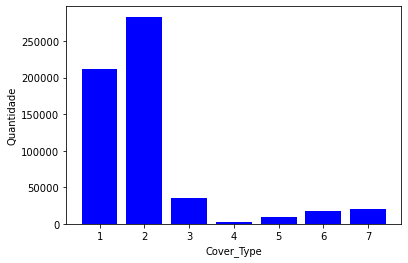

In [113]:
plt.bar(attr.index, attr.values, color = "blue")
plt.xlabel("Cover_Type")
plt.ylabel("Quantidade")

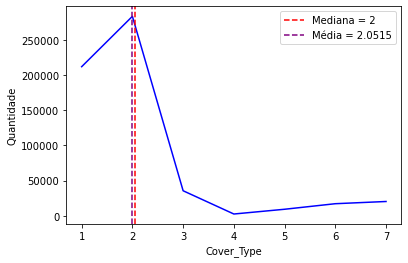

In [110]:
plt.plot(attr.index, attr.values, color = "blue")
plt.xlabel("Cover_Type")
plt.ylabel("Quantidade")

plt.axvline(x = media ,color="red",linestyle="--", label="Mediana = 2")

plt.axvline(x = median.median() ,color="purple",linestyle="--", label="Média = 2.0515")

plt.legend()

Pode-se ver que o valor da Mediana é **2**.
E que o valor da Média é **2.0515**.

Escolheu-se a mediana, já que o atributo preditor *Cover_type* é inteiro e a mediana reflete exatamente o mesmo tipo, foi desconsiderado a média, mesmo que houvesse apenas uma pequena variação.

### 2. A partir da visualização elaborada, o que pode-se dizer a respeito do balanceamento do atributo-alvo?
Pode-se dizer que a distribuição de *cover_type* desse *DataFrame* é bem **desbalanceado**.  

Pelo gráfico acima, é possível perceber que existem muito mais exemplos dos *cover_type* 1 e 2, a quantidade de *cover_type* 3 a 7 é significantemente menor.  

Portanto, pode-se falar que os atributos tendem para esses 2 tipos(1 e 2).


### 3. Que tipo de tarefa de Aprendizado de Máquina é sugestiva para este problema?

Como o proprio dataset indica, este é um problema de classificacao.  

Sendo assim, um algoritmo de classificacao multiclasse é adequado para o problema, sendo eles: Árvores de Decisão, Classificação Naïve Bayes, Regressão Linear de Mínimos Quadrados, Regressão logística, Support Vector Machine.  

Dentre esse algoritmos, a equipe escolheu o algoritmo de classificação Naïve Bayes que usa probabilidades para o cálculo 
 P (A| B) = ( P (B|A) * P (A) ) / P (B) que serve para predizer um problema relativamente similar ao atual que é o de Classificar um artigo de notícias sobre tecnologia, política ou esportes.

### 3.1 Apresente métricas de desempenho compatíveis para a avaliação do problema (liste-as)

Existem 4 métricas para medir o desempenho do problema de classificação.  

As 4 métricas seguem a tabela da **matriz de confusão**, que se consegue depois da máquina ter sido treinada e testada.  

A matriz de confusão descreve se as respostas positivas e negativas são válidas ou não, ela pode ser traduzida para uma matriz de 3 classes ou mais, mas a matriz abaixo é a binária, apenas para explicar.

| Matriz de Confusão | Verdadeiro | Falso |
| :- | :- | :-: |
| Positivo | Verdadeiro Positivo | Falso Positivo |
| Negativo | Verdadeiro Negativo | Falso Negativo |

Essas 4 métricas são:  

1. **Acurária**  

A acurácia é, dentre o **Verdadeiro positivo e verdadeiro negativo**, os acertos divididos pela quantidade total.  

$Precisao = \frac{VP + VN}{Total}$

Com isso, a acurácia indica se houve uma boa quantidade de respostas válidas do total.


2. **Precisão**  

A precisão é, dentre o **Verdadeiro positivo e falso positivo**, a quantidade de positivos divididos pela quantidade total.

$Precisao = \frac{VP}{VP + FP}$

A precisão indica a porcentagem de respostas válidas dentro das respostas positivas.

3. **Recall**  

O recall é, dentre o **Verdadeiro positivo e falso negativo**, a quantidade de positivos divido pela soma dos dois.

$Precisao = \frac{VP}{VP + FN}$

O recall indica acertos válidos preditos pelo modelo, a porcentagem de respostas corretas.


4. **F1 Score**  

Já o F1 Score é um pouco diferente.  

Ao invés de se basear na matriz de confusão, o F1Score é a média harmônica entre a precisão e o Recall.  
Ele é usado para indicar como está o estado do modelo, em conjunto com a acurácia.

A acurária é usado para indicar a quantidade de acertos.
Porém, o F1Score indica quais os impactos dos falsos positivos e falsos negativos dentro domodelo.



### 3.2 Escolha uma das métricas apresentadas para ser utilizada como referência pela equipe
Com relação as métricas de avaliação de modelos, pode-se dizer que para essa base de dados não seria indicado usar a **acurácia** pois os dados não se encontram igualmente dispersos entre si.  

A técnica de **precisão** também não é muito indicada, pois ela leva em consideração os falsos positivos pois trata-se de classificar um resultado de maneira precisa, sendo assim a principal utilização dessa métrica é para modelos onde é preciso minimizar os falsos positivos.  

A técnica **recall** é usada para obter os acertos do modelo, ou seja os falsos negativos e os verdadeiros positivos, sendo assim essa métrica por si só não é diretamente vinculada a classificar todos os casos corretamente.  

Com isso a equipe resolveu escolher a métrica de avaliação **F1 Score** pois embora seja a menos intuitiva ela é capaz de combinar as métricas precisão e recall e tambem no geral, essa metrica é melhor que acuracia principalmente onde falsos positivos e falsos negativos possuem impactos diferentes em um modelo.


